# ISE 7B

Team - Data Divers

1MS18IS103 - Sneha Kulkarni

1MS18IS121 - Vaishnavi S

1MS18IS122 - Vandana G

1MS18IS124 - Vijaya Madhuri T A

# INDIAN STARTUP FUNDING

Research question : How startup funding in India has changed over time and which industries are favoured?

**Introduction**
The Indian startup Ecosystem started in the late 1960s with the start of
TCS, followed by Infosys in 1981 and others. These startups started as
software services serving Indian software needs, and later expanding to
exporting software services. Being so startup friendly the country has
attracted numerous numbers of investors, both national and international.
Therefore a large amount of money is poured into the startup ecosystem.
Startup is defined as “an entrepreneurial venture or a new business in the
form of a Company, a partnership or temporary organization designed and
searched for a repeatable and scalable business model. Startup India
brings excitement and immense possibilities for the future. India
acknowledged the stark reality of modern business and its complexity.
India has one of the largest startup ecosystems in the world, expected to
witness growth of 10–12%. With ~20,000 startups in India, around 4,750 of
these are technology-led startups 1,400 new tech startups were born in
2016 alone, implying there are 3–4 tech startups born every day.
Considering all these factors, analyzing startup funding becomes
interesting.

**Summary** 
In the present decade, India is planning a vital shift in the direction of
startup welcoming policies and a business-friendly or entrepreneur’s
environment. India is one of the fastest growing countries in terms of
entrepreneurship. This project intends to offer an analytical
overview of the boom and potentialities of startup systems in India i.e the
progress made by India so far. Therefore, this research can contribute to a
better understanding of the Investment and financing strategy of
entrepreneurial ventures.
This project presents the trend and growth pattern of startup ventures,
their types and different stages of funding in India. The prime objective of
this research was to study the growth pattern of the startups and stages
of funding received by these startups. The analysis has shown Indian
start-up companies prefer primarily funding in four different stages, such
as early stage, growth stage, expansion stage and bridge funding. The
result has also shown that maximum funding was received in the expansion
stage in the financial years.

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Dataset Information:** We got the dataset from Kaggle and Github. This dataset has funding information of the Indian startups from 2016 to 2020. It includes columns with the date funded, the name of the startup, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

**Questions to be analysed --**
* Total funding in each year
* Top 10 industries which are favourite of Investors.
* Top 10 cities which have maximum startups.
* Top 10 Industry where funding is maximum.
* Percentage share of startups based on location
* Top 10 types of investment with maximum startups.

Importing the data

In [2]:
df = pd.read_csv('indian_startup_funding(raw).csv', encoding='unicode_escape')
#df.drop(['Unnamed: 7'], axis=1, inplace=True)
df.head()

,Date,Startup Name,Industry,Investors,Investment Type,Location,Amount in USD
0,08-04-2016,imedilane,Consumer Internet,"Mahendra Patel, Nilender Chauhan",Seed Funding,New Delhi,40000
1,08-04-2016,Little Black Book,Consumer Internet,"IDG, Indian Angel Network",Seed Funding,New Delhi,NaN
2,08-04-2016,Vahan,Education,Villgro,Seed Funding,Chennai,NaN
3,08-04-2016,Little Black Book,Consumer Internet,"IDG, Indian Angel Network",Seed Funding,New Delhi,NaN
4,08-04-2016,Vahan,Education,Villgro,Seed Funding,Chennai,NaN


Knowing our data

In [3]:
print('Shape of data : ',df.shape)
df.describe()

Shape of data :  (3743, 7)


,Date,Startup Name,Industry,Investors,Investment Type,Location,Amount in USD
count,3743,3743,3743,3719,3736,3732,2478
unique,864,1932,174,1897,90,69,685
top,01-12-2020,Nykaa,Consumer Internet,Undisclosed Investors,Seed Funding,Bangalore,1000000
freq,41,10,1722,56,1703,987,125


In [4]:
df.columns

Index(['Date', 'Startup Name', 'Industry', 'Investors', 'Investment Type',
       'Location', 'Amount in USD'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             3743 non-null   object
 1   Startup Name     3743 non-null   object
 2   Industry         3743 non-null   object
 3   Investors        3719 non-null   object
 4   Investment Type  3736 non-null   object
 5   Location         3732 non-null   object
 6   Amount in USD    2478 non-null   object
dtypes: object(7)
memory usage: 204.8+ KB


In [6]:
df.isnull().sum()

Date                  0
Startup Name          0
Industry              0
Investors            24
Investment Type       7
Location             11
Amount in USD      1265
dtype: int64

Data Pre-Processing

Data preprocessing is a data mining technique which is used to
transform the raw data in a useful and efficient format.


**Converting all values to lowercase**

In [7]:
df['Startup Name'] = df['Startup Name'].str.lower()
df['Industry'] = df['Industry'].str.lower()
df['Location'] = df['Location'].str.lower()
df['Investment Type'] = df['Investment Type'].str.lower()
df['Investors'] = df['Investors'].str.lower()


**EDA** It involves generating summary statistics for numerical data in the
dataset and creating various graphical representations to understand the
data better.
Exploratory Data Analysis is a crucial step before you jump to machine
learning or modeling of your data. By doing this we can get to know
whether the selected features are good enough to model, are all the
features required, are there any correlations based on which we can either
go back to the Data Pre-processing step or move on to modeling.

**Replacing misspelled attributes**

Since we will deal with only Indian States & Cities, We will replace all the cities where multiple cities are given with first Indian City/state

In [8]:
df['Location'] = df['Location'].replace(['bangalore','bengaluru','sfo / bangalore'],'bangalore')
df['Location'] = df['Location'].replace(['new delhi','delhi'],'new delhi')
df['Location'] = df['Location'].replace(['ahmedabad','ahemadabad'],'ahmedabad')
df['Location'] = df['Location'].replace(['kormangala','bangalore'],'bangalore')
#df['Investment type'] = df['Investment type'].replace([''])

Removing 

In [9]:
#df.drop(df[df['Location'] == nan].index, inplace = True)
df.drop(df[df['Location'] == 'india'].index, inplace = True)
df.drop(df[df['Location'] == 'karnataka'].index, inplace = True)

Grouping type of investment

In [10]:
df['Investment Type'] = df['Investment Type'].replace(['seed', 'funding','seed funding','in progress','seed funding round','seed round','seed/angel funding','seed / angel funding', 'angel / seed funding', 'angel funding', 'seed/ angel funding','funding round','personal investment','seed / angle funding','angel','m&a','angel round'],'seed')
df['Investment Type'] = df['Investment Type'].replace(['debt financing' , 'debt-funding','debt funding', 'debt','debt and preference capital','structured debt'],'debt')
df['Investment Type'] = df['Investment Type'].replace(['privateequity','private funding','private','privatefunding','equity based funding','equity', 'private equity','private equity round'],'private equity')
df['Investment Type'] = df['Investment Type'].replace(['series 1','series a','pre-series a','pre series a','pre-series a funding'],'series a')
df['Investment Type'] = df['Investment Type'].replace(['pre-series b','series b','series b (extension)'],'series b')
df['Investment Type'] = df['Investment Type'].replace(['series c','series c1','pre-series c'],'series c')
df['Investment Type'] = df['Investment Type'].replace(['series d1','series d'],'series d')
df['Investment Type'] = df['Investment Type'].replace(['secondary market','bridge funding','follow-on','inhouse funding','corporate round','maiden round','bridge round','mezzanine','term loan'],'others')
df['Investment Type'] = df['Investment Type'].replace(['venture', 'venture series','venture-series unknown', 'venture round', 'single venture', 'venture - series unknown'],'venture')
df['Investment Type'] = df['Investment Type'].replace(['series e','pre-series e'],'series e')
df['Investment Type'] = df['Investment Type'].replace(['pre seed','pre-seed', 'pre-seed funding','preseed'],'pre-seed')

In [11]:
df.nunique()

Date                862
Startup Name       1846
Industry            149
Investors          1871
Investment Type      15
Location             50
Amount in USD       683
dtype: int64

In [12]:
df['Investment Type'].unique()

array(['seed', 'private equity', nan, 'debt', 'others', 'series e',
       'series a', 'series c', 'series d', 'series b', 'venture',
       'series j', 'series f', 'pre-seed', 'series g', 'series h'],
      dtype=object)

In [13]:
df['Location'].unique()

array(['new delhi', 'chennai', 'mumbai', 'gurgaon', nan, 'bangalore',
       'pune', 'jaipur', 'noida', 'chandigarh', 'hyderabad', 'vadodara',
       'singapore', 'lucknow', 'kanpur', 'trivandrum', 'indore',
       'siliguri', 'ahmedabad', 'kolkata', 'coimbatore', 'kerala',
       'kozhikode', 'kochi', 'hubli', 'agra', 'goa', 'udupi', 'panaji',
       'gwalior', 'karur', 'surat', 'gaya', 'gurugram', 'faridabad',
       'ahemdabad', 'bhubaneswar', 'udaipur', 'srinagar', 'nagpur',
       'rourkela', 'bhopal', 'nairobi', 'haryana', 'taramani', 'amritsar',
       'patna', 'sohna', 'thane', 'varanasi', 'jodhpur'], dtype=object)

In [14]:
df.rename(columns={'Amount in USD': 'Amount(USD)'}, inplace=True)

**Removing commas from "Amount in USD" column**

In [15]:
df["Amount(USD)"] = df["Amount(USD)"].apply(lambda x: str(x).replace(",",""))
df["Amount(USD)"] = pd.to_numeric(df["Amount(USD)"],errors='coerce')

In [16]:
df['Amount(USD)'] = df['Amount(USD)'].fillna(df['Amount(USD)'].mode()[0])


In [17]:
df = df.dropna()
df.shape

(3698, 7)

In [18]:
df.isnull().sum()

Date               0
Startup Name       0
Industry           0
Investors          0
Investment Type    0
Location           0
Amount(USD)        0
dtype: int64

**Splitting date into day, month and year**

In [19]:
df[["day", "month", "year"]] = df["Date"].str.split("-", expand = True)
df.drop(['day', 'month', 'year'], axis = 1)
df.head()

,Date,Startup Name,Industry,Investors,Investment Type,Location,Amount(USD),day,month,year
0,08-04-2016,imedilane,consumer internet,"mahendra patel, nilender chauhan",seed,new delhi,40000.0,08,04,2016
1,08-04-2016,little black book,consumer internet,"idg, indian angel network",seed,new delhi,1000000.0,08,04,2016
2,08-04-2016,vahan,education,villgro,seed,chennai,1000000.0,08,04,2016
3,08-04-2016,little black book,consumer internet,"idg, indian angel network",seed,new delhi,1000000.0,08,04,2016
4,08-04-2016,vahan,education,villgro,seed,chennai,1000000.0,08,04,2016


Dropping unnecessary columns

In [20]:
df=df.drop(['Date'],axis=1)

In [21]:
df['Amount(USD)'] = pd.to_numeric(df['Amount(USD)'])

In [22]:
type(df['Amount(USD)'][0])

numpy.float64

Grouping Industries

In [23]:
df['Industry']=df['Industry'].replace(['food and beverage','food & beverages','food & beverage','food and beverages','foodtech','fusion beverages','food-tech','food','food tech','b2b-focused foodtech startup','cafe','food production','dairy startup','food delivery','dairy tech'],'Food delivery/industry')
df['Industry']=df['Industry'].replace(['financial services','finance','fin-tech' ,'fintech','fiinance', 'financial tech','accounting', 'investment', 'finance company','rural fintech','rural fintech','digital reconcilation and financial services'],'financial services')
df['Industry']=df['Industry'].replace(['edtech', 'edutech', 'education', 'e-tech', 'online education','deep-tech','clean-tech','ed-tech'],'education')
df['Industry']=df['Industry'].replace(['travel tech', 'travel and tourism', 'transportation','transport', 'last mile transportation'],'transportation')
df['Industry']=df['Industry'].replace(['gaming and entertainment', 'online gaming','ott player', 'video customer experience(cx) platform', 'video games', 'gaming'],'gaming/entertainment')
df['Industry']=df['Industry'].replace(['e-commerce','ecommerce','commerce and shopping','ecommece'],'e-commerce')
df['Industry']=df['Industry'].replace(['healthcare','health','hospitality','health and wellness', 'health care','healthtech'],'health')
df['Industry']=df['Industry'].replace(['ai startup','ai','ai company','conversational ai platform','deep tech ai','artificial intelligence','saas','ai'],'ai')
df['Industry']=df['Industry'].replace(['agtech','agritech','agriculture','agriculture'],'agriculture')
df['Industry']=df['Industry'].replace(['consumer internet','consumer interne','consumer appliances','consumer technology','consumer portal','customer service','customer service platform','services','consumer technology','consumer goods'],'customer services')
df['Industry']=df['Industry'].replace(['software company' , 'information technology and services', 'information technology', 'it','tech','technology provider','digital solutions','technology','hr tech'],'it')
df['Industry']=df['Industry'].replace(['iot startup','saas platform', 'saas startup','iot','co-working spaces','co-working startup','blockchain startup'],'tech startup')
df['Industry']=df['Industry'].replace(['social media','marketplace','online marketplace','content management','media', 'digital media','b2b','b2b platform','b2b marketing', 'advertising','marketing','video','social network'],'social media')
df['Industry']=df['Industry'].replace(['aerospace','airfare marketplace', 'automotive rental','auto','automotive','automation','automobile'],'automobile')
df['Industry']=df['Industry'].replace(['fashion','personal care','fashion and apparel','luxury label','personal care','lifestyle'],'fashion')
df['Industry']=df['Industry'].replace(['logistics solution provider','supply chain', 'logistics tech','hyper-local logistics'],'logistics')
df['Industry']=df['Industry'].replace(['nanotechnology','enterprise software','services platform','waste management service','energy','block chain, cryptocurrency','block chain','blockchain','cryptocurrency','biotech','industrial robotics','water purification','intelligent marketing cloud'],'other technologies')
df['Industry']=df['Industry'].replace(['nbfc','compliance','utility solutions provider','advertising, marketing','legaltech','other','professional network for women','fmcg','publishing','crowdsorcing','marketing company','bfsi','retail'],'others')
df['Industry']=df['Industry'].replace(['reality','real estate'],'real estate')
df['Industry']=df['Industry'].replace(['human resources','inspiration','storytelling','crowdsourcing'],'inspiration')

In [24]:
df['Industry'].nunique()

20

**Amount allocated to startups with respect to the years**

In [25]:
df.columns

Index(['Startup Name', 'Industry', 'Investors', 'Investment Type', 'Location',
       'Amount(USD)', 'day', 'month', 'year'],
      dtype='object')

In [26]:
amount=list(df.groupby(df['year']).sum()['Amount(USD)'])
def currency_inword(x):
    if(len(str(int(np.round(x))))>9):
        return str(x)[0]+'.'+str(x)[1:3]+'B'
    elif(len(str(int(np.round(x))))==9):
        return str(x)[0:3]+'M'
curr=[]
for i in range(len(amount)):
    curr.append(currency_inword(amount[i]))

print(curr)

['8.47B', '1.66B', '4.48B', '9.09B', '3.25B']


[8.47, 1.66, 4.48, 9.09, 3.25]


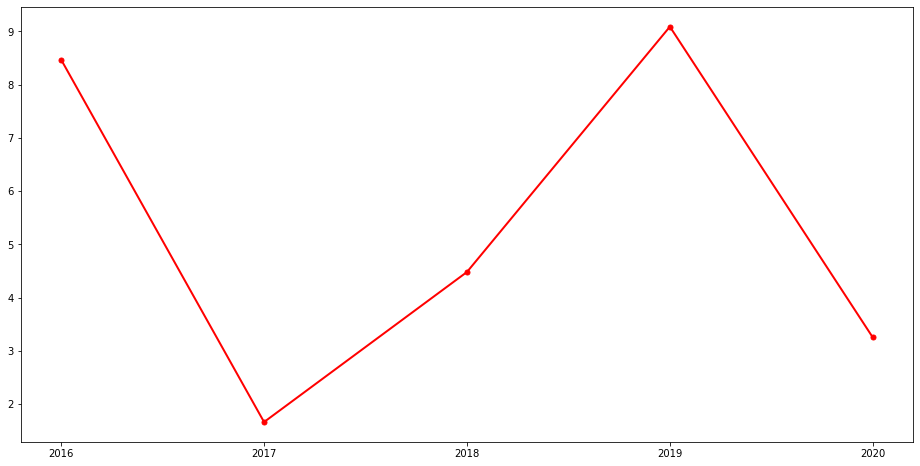

In [27]:
values=[]
values = curr

year_val=list(df['year'].value_counts().index.sort_values())
print

curr_list = []
for number in curr:
  number = number[:4]
  curr_list.append(number)
  

#converting to float
for i in range(0, len(curr_list)):
    curr_list[i] = float(curr_list[i])

print(curr_list)
x = year_val
y = curr_list

plt.figure(figsize=(16,8))
plt.plot(x, y, color='red', linestyle='solid', linewidth = 2, marker='o', markerfacecolor='red', markersize=5)
plt.show()

Maximum number of startups were funded in 2019 followed by 2016.

The least number of startups was in 2017 which then saw a gradual
increase in the number of startups.

**Industry Vs Number of Startups**

Graph between the top 10 industries and the total number of startups from 2016 to 2020

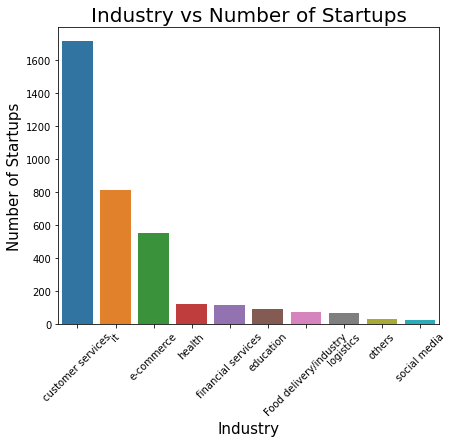

In [28]:
industry = df['Industry'].value_counts()
plt.figure(figsize=(15,12))
plt.subplot(221)
g = sns.barplot(x=industry.index[:10],y=industry.values[:10])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Industry", fontsize=15)
g.set_ylabel("Number of Startups", fontsize=15)
g.set_title('Industry vs Number of Startups', fontsize=20)
plt.show()

Consumer Internet and Technology industries are in high demand by Investors.
Their future is good.
If one want to start a new startup then they should start in these industries.
It's good to see Education industry in top 10

**Top 10 Cities with maximum number of startups**

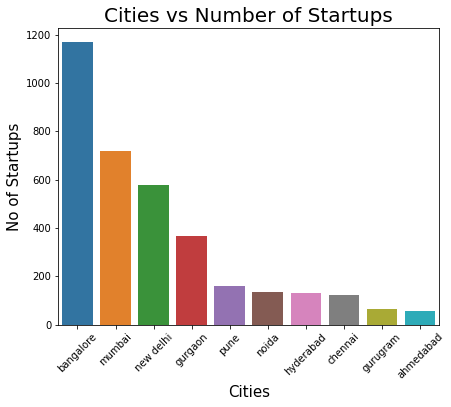

In [29]:
city=df['Location'].value_counts()
plt.figure(figsize=(15,12))
plt.subplot(221)
g = sns.barplot(x=city.index[:10],y=city.values[:10])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Cities", fontsize=15)
g.set_ylabel("No of Startups", fontsize=15)
g.set_title('Cities vs Number of Startups',fontsize=20)
plt.show()

Maximum number of startups were founded in Bengaluru followed by Mumbai, Delhi, Gurugram and Pune. The reasons for Bengalurur being the startup capital of India can be attributed to it being the technical hub with almost every MNC being located there.

**Fund received for each industry**

In [30]:
industries=df.groupby('Industry')
each_industry_fund=[]
count_of_ind=df.Industry.unique()
for i in count_of_ind:
  ind=industries.get_group(i)
  sum=0
  for j in ind['Amount(USD)']:
    #j=j.replace(',','')
    sum=sum+float(j)
  each_industry_fund.append(sum)
print(each_industry_fund)

[10885280434.0, 3160582105.0, 24229030325.0, 5353104206.0, 3903934430.0, 559592800.0, 1488695829.07, 2014181647.0, 2574867000.0, 67000000.0, 368200000.0, 11200000.0, 20801047.92, 193100000.0, 1110983275.0, 81900000.0, 11616298394.0, 3254948600.0, 284883806.0, 76910000.0]


Text(0.5, 1.0, 'Total fund received for each industry')

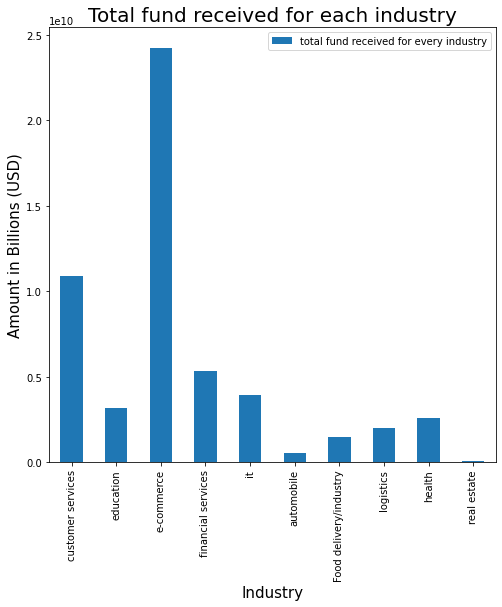

In [31]:
data = pd.DataFrame({'total fund received for every industry': each_industry_fund,
                   'industry': count_of_ind }, index=count_of_ind)

# plt.plot(ax)
g=data.head(10).plot.bar(figsize=(8,8))
g.set_ylabel('Amount in Billions (USD)',fontsize=15)
g.set_xlabel('Industry',fontsize=15)
g.set_title('Total fund received for each industry',fontsize=20)


The highest amount in billions was invested in e-commerce and
secondly on transportation. The other industries which had
good investments were financial services, IT, education, food
and services and logistics

**Percentage distribution of startups based on location**

In [32]:
freq_loc=df['Location'].value_counts().head(10)
freq_loc
percent=freq_loc/df.shape[0] * 100
percent

bangalore    31.584640
mumbai       19.388859
new delhi    15.657112
gurgaon       9.897242
pune          4.299621
noida         3.677664
hyderabad     3.569497
chennai       3.272039
gurugram      1.730665
ahmedabad     1.514332
Name: Location, dtype: float64

Bangalore has almost 31% of the country's startups, followed by Mumbai with 19% and New Delhi with 15%. 

**Investment type vs number of startups**

seed              1880
private equity    1559
series a            73
series b            41
debt                39
series c            30
series d            20
venture             15
others              12
series f             9
series e             8
pre-seed             5
series g             4
series h             2
series j             1
Name: Investment Type, dtype: int64


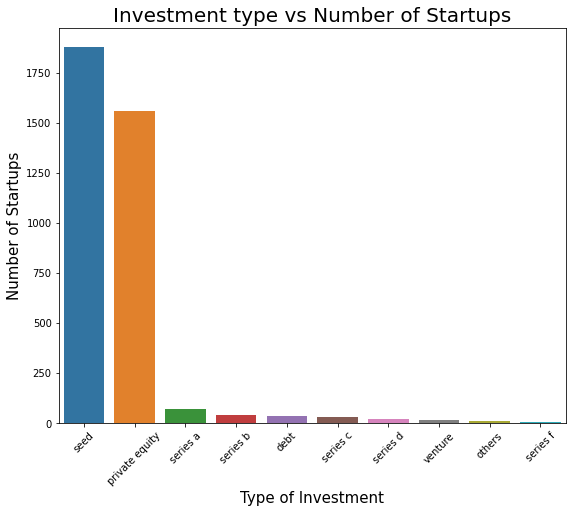

In [33]:
i_type=df['Investment Type'].value_counts()
plt.figure(figsize=(20,16))
plt.subplot(221)
print(i_type)
g = sns.barplot(x=i_type.index[:10],y=i_type.values[:10])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Investment", fontsize=15)
g.set_ylabel("Number of Startups", fontsize=15)
g.set_title('Investment type vs Number of Startups',fontsize=20)
plt.show()

Seed Funding was the major contributor in the startup ecosystem with respect to the number of startups funded followed by Private Equity, Series A, Series B and Debt.

**Hypothesis Testing**

Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution.
Since our parameters are categorical, we have to choose a non-parametric test i.e. Chi-square test.

Chi square test:

A chi-square statistic is one way to show a relationship between two categorical variables. The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population.


**Chi-Square Test**

In [34]:
m=df['Location'].value_counts().head(10)
locations=m.keys()
print(locations)

Index(['bangalore', 'mumbai', 'new delhi', 'gurgaon', 'pune', 'noida',
       'hyderabad', 'chennai', 'gurugram', 'ahmedabad'],
      dtype='object')


In [35]:
from scipy.stats import chi2_contingency
years=(df.year.unique())[::-1]
data =[]
yr=df.groupby('year')

total_startups_each_yr=[]

for i in years:
  sum=0
  Location_count=[]
  yrdata=yr.get_group(i)
  x=yrdata['Location'].value_counts()
  print('for year',i,':')
  print(' ')
  for j in locations:
    if(j not in x):
      x[j]=0
    Location_count.append(x[j])
    print(j,'=',x[j])
  print(' ')
  for i in Location_count:
    sum+=i
  total_startups_each_yr.append(sum)
  data.append(Location_count)

for year 2020 :
 
bangalore = 79
mumbai = 35
new delhi = 14
gurgaon = 21
pune = 9
noida = 8
hyderabad = 3
chennai = 6
gurugram = 13
ahmedabad = 3
 
for year 2019 :
 
bangalore = 38
mumbai = 17
new delhi = 11
gurgaon = 16
pune = 4
noida = 4
hyderabad = 4
chennai = 2
gurugram = 4
ahmedabad = 0
 
for year 2018 :
 
bangalore = 98
mumbai = 57
new delhi = 21
gurgaon = 4
pune = 11
noida = 7
hyderabad = 10
chennai = 16
gurugram = 47
ahmedabad = 3
 
for year 2017 :
 
bangalore = 371
mumbai = 233
new delhi = 166
gurgaon = 118
pune = 45
noida = 36
hyderabad = 56
chennai = 35
gurugram = 0
ahmedabad = 15
 
for year 2016 :
 
bangalore = 582
mumbai = 375
new delhi = 367
gurgaon = 207
pune = 90
noida = 81
hyderabad = 59
chennai = 62
gurugram = 0
ahmedabad = 35
 


A comparison has been made between fund received and the location of the startup.
The null hypothesis is rejected, which means the fund received may be dependent on the location of the startup.



In [36]:
df.head()

,Startup Name,Industry,Investors,Investment Type,Location,Amount(USD),day,month,year
0,imedilane,customer services,"mahendra patel, nilender chauhan",seed,new delhi,40000.0,08,04,2016
1,little black book,customer services,"idg, indian angel network",seed,new delhi,1000000.0,08,04,2016
2,vahan,education,villgro,seed,chennai,1000000.0,08,04,2016
3,little black book,customer services,"idg, indian angel network",seed,new delhi,1000000.0,08,04,2016
4,vahan,education,villgro,seed,chennai,1000000.0,08,04,2016


In [37]:
data= pd.DataFrame([df['Amount(USD)'], df['Location'], df['Industry']]).transpose()
data.head()

,Amount(USD),Location,Industry
0,40000,new delhi,customer services
1,1e+06,new delhi,customer services
2,1e+06,chennai,education
3,1e+06,new delhi,customer services
4,1e+06,chennai,education


# Naive Bayes

A classifier is a machine learning model that is used to discriminate different objects based on certain features. 
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

In [38]:
data=pd.DataFrame([df['Investment Type'], df['Location'], df['Industry']]).transpose()
X = data.iloc[:, [1, 2]].values
y = data.iloc[:, 0].values
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X.head()
y.head()

,0
0,seed
1,seed
2,seed
3,seed
4,seed


In [39]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import recall_score,accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(X)
data_x = pd.DataFrame(data_encoded)
data_encoded

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(y)
# car_df_encoded['class'] = target_encoded
# encoder.inverse_transform(target_encoded)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.3, random_state=143)

cnb = CategoricalNB()
cnb.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)

print("Recall score : ", recall_score(y_test, y_pred_cnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_cnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_cnb , average='micro'))
print('accuracy score', accuracy_score(y_test, y_pred_cnb) )

Recall score :  0.5612612612612613
Precision score :  0.5612612612612613
F1 score :  0.5612612612612613
accuracy score 0.5612612612612613


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Supervised Learning Technique**


Can we predict the funding amount given the industry and location of the startup?
It has one unknown variable and two known variables. It can be done using Linear Regression.

**Linear Regression**:
Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

